This is a notebook to plot the results of the dark disk analysis.  We introduce some basic plotting settings that are used in our paper and a function which allows the user to easily plot the contents of the results files.

In [1]:
# Import packages
import colorsys
import numpy as np

import matplotlib as mpl
import matplotlib.colors as mc
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.ticker

In [2]:
# Set some plotting parameters
fs = 18 # font size

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'legend.fontsize': fs,
                     'axes.labelsize': fs,
                     'axes.titlesize': fs,
                     'xtick.labelsize': fs,
                     'ytick.labelsize': fs})
plt.rcParams["figure.figsize"] = (7,5) # figure size

mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True

In [3]:
# Custom ticker which renders 10^-1 and 10^1 as 0.1 and 10
class CustomTicker(matplotlib.ticker.LogFormatterSciNotation): 
  
    def __call__(self, x, pos = None): 
  
        if x not in [0.1, 1, 10]: 
            return matplotlib.ticker.LogFormatterSciNotation.__call__(self, x, pos = None) 
  
        else: 
            return "{x:g}".format(x = x)

In [4]:
# Function to adjust lightness of shading color (used for shading of fiducial curve)
def adjust_lightness(color, amount=0.5):
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], max(0, min(1, amount * c[1])), c[2])

In [5]:
# Function to plot contents of results files
# Inputs:
# - files: list of results files to be plotted (without initial 'result-' or final '.txt')
# - colors: list of colors (and linestyles) to be used for each result curve
# - ylims: tuple of lower and upper limits for vertical axis
# - shade_fiducial: optional parameter to control whether fiducial curve should be shaded

def plot(files, colors, labels, ylims, shade_fiducial = True):
    fig, ax = plt.subplots(figsize=(7,5))
    for i in range(len(files)):
        file = files[i]
        results = np.loadtxt('result-' + file + '.txt')
        ax.loglog(results.T[0], results.T[1], colors[i], label=labels[i])
        if file == "fiducial" and shade_fiducial:
            ax.fill_between(results.T[0], results.T[1], y2=np.ones(len(results.T[1])), color=adjust_lightness("red", amount=1.91))
    
    ax.set_xlabel('$m_{\chi}^{\mathrm{disk}}$ [GeV]')
    ax.set_ylabel(r'$\sigma_p^{\mathrm{SI;disk}}\Sigma^{\mathrm{disk}}$ [$\mathrm{cm}^2~M_\odot/\mathrm{pc}^2$]')
    ax.set_xlim(1, 1e3)
    ax.set_ylim(*ylims)
    ax.legend()

    ax.xaxis.set_major_formatter(CustomTicker()) 
    ax.yaxis.set_major_formatter(CustomTicker())
    
    locmaj = matplotlib.ticker.LogLocator(base=10,numticks=12) 
    ax.yaxis.set_major_locator(locmaj)
    locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=12)
    ax.yaxis.set_minor_locator(locmin)
    ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

    ax.tick_params(axis="y",which="major",direction="in", length=6, pad=6)
    ax.tick_params(axis="y",which="minor",direction="in", length=3)
    ax.tick_params(axis="x",which="major",direction="in", length=6, pad=6)
    ax.tick_params(axis="x",which="minor",direction="in", length=3)
    
    plt.show()

# Plots of analysis results

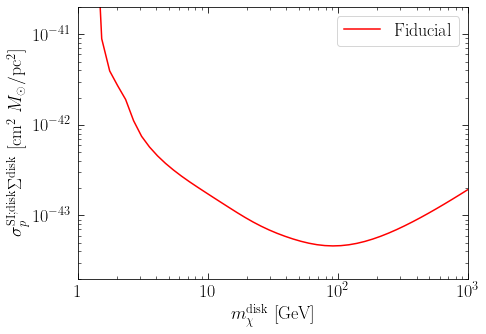

In [6]:
# Fiducial curve
plot(['fiducial'],
    ['r'],
    ['Fiducial'],
    (2e-44, 2e-41), shade_fiducial = False)

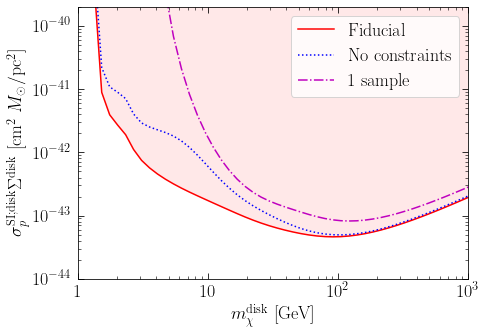

In [7]:
# Comparison to case without constraints and to single-sample case
plot(['fiducial', 'noconstraints', '1rock'],
    ['r', 'b:', 'm-.'],
    ['Fiducial', 'No constraints', '1 sample'],
    (1e-44, 2e-40))

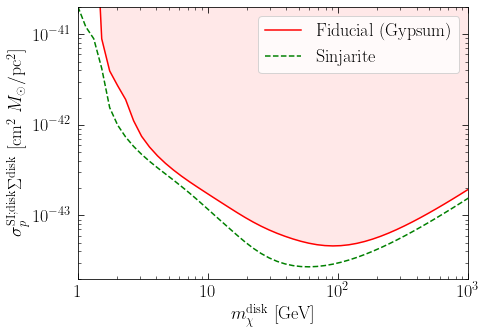

In [8]:
# Comparison with other mineral (sinjarite)
plot(['fiducial', 'sinjarite'],
    ['r', 'g--'],
    ['Fiducial (Gypsum)', 'Sinjarite'],
    (2e-44, 2e-41))

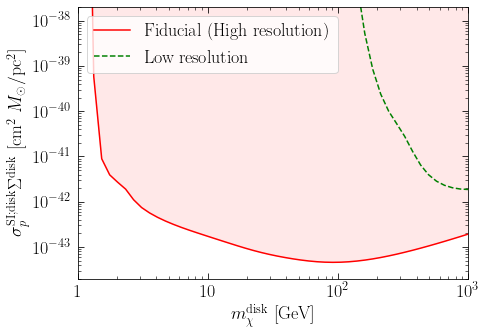

In [9]:
# Comparison between high and low resolution readout scenarios
plot(['fiducial', 'lowres'],
    ['r', 'g--'],
    ['Fiducial (High resolution)', 'Low resolution'],
    (2e-44, 2e-38))

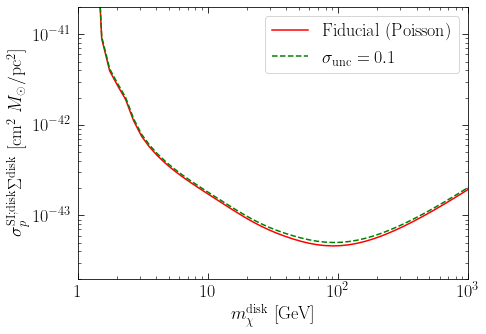

In [10]:
# Effect of bin-to-bin systematic uncertainties
plot(['fiducial', 'gaussian'],
    ['r', 'g--'],
    ['Fiducial (Poisson)', r'$\sigma_{\mathrm{unc}} = 0.1$'],
    (2e-44, 2e-41), shade_fiducial = False)

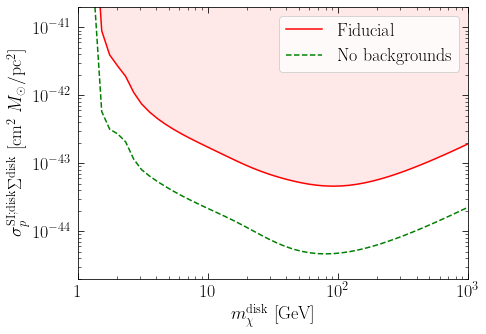

In [11]:
# Comparison to sensitivity without backgrounds
plot(['fiducial', 'nobkgs'],
    ['r', 'g--'],
    ['Fiducial', 'No backgrounds'],
    (2e-45, 2e-41))

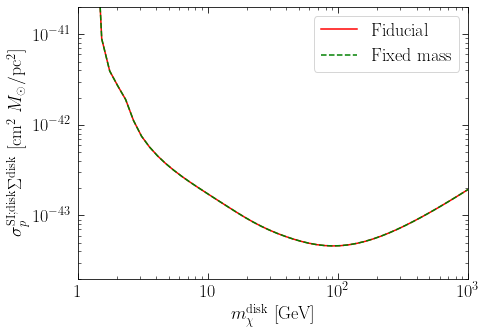

In [12]:
# Effect of fixing mass (instead of treating as nuisance parameter with small uncertainty)
plot(['fiducial', 'nomassopt'],
    ['r', 'g--'],
    ['Fiducial', 'Fixed mass'],
    (2e-44, 2e-41), shade_fiducial = False)